# Breadth First Search

In [2]:
queue = []
visited = []

graph = {
    '5': ['2', '6'],
    '2': ['3', '9'],
    '6': ['1'],
    '3': [],
    '9': ['1'],
    '1': []
}

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)

    while queue:
        m = queue.pop(0)
        print(m, end=" ")

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)


print("Following is the breadth-first search")
bfs(visited, graph, '5')



Following is the breadth-first search
5 2 6 3 9 1 

# Depth First Search

In [3]:
graph = {
    '5': ['2', '6'],
    '2': ['3', '9'],
    '6': ['1'],
    '3': [],
    '9': ['1'],
    '1': []
}
visited = set()


def dfs(visited, graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)


print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
2
3
9
1
6


# Decision Tree

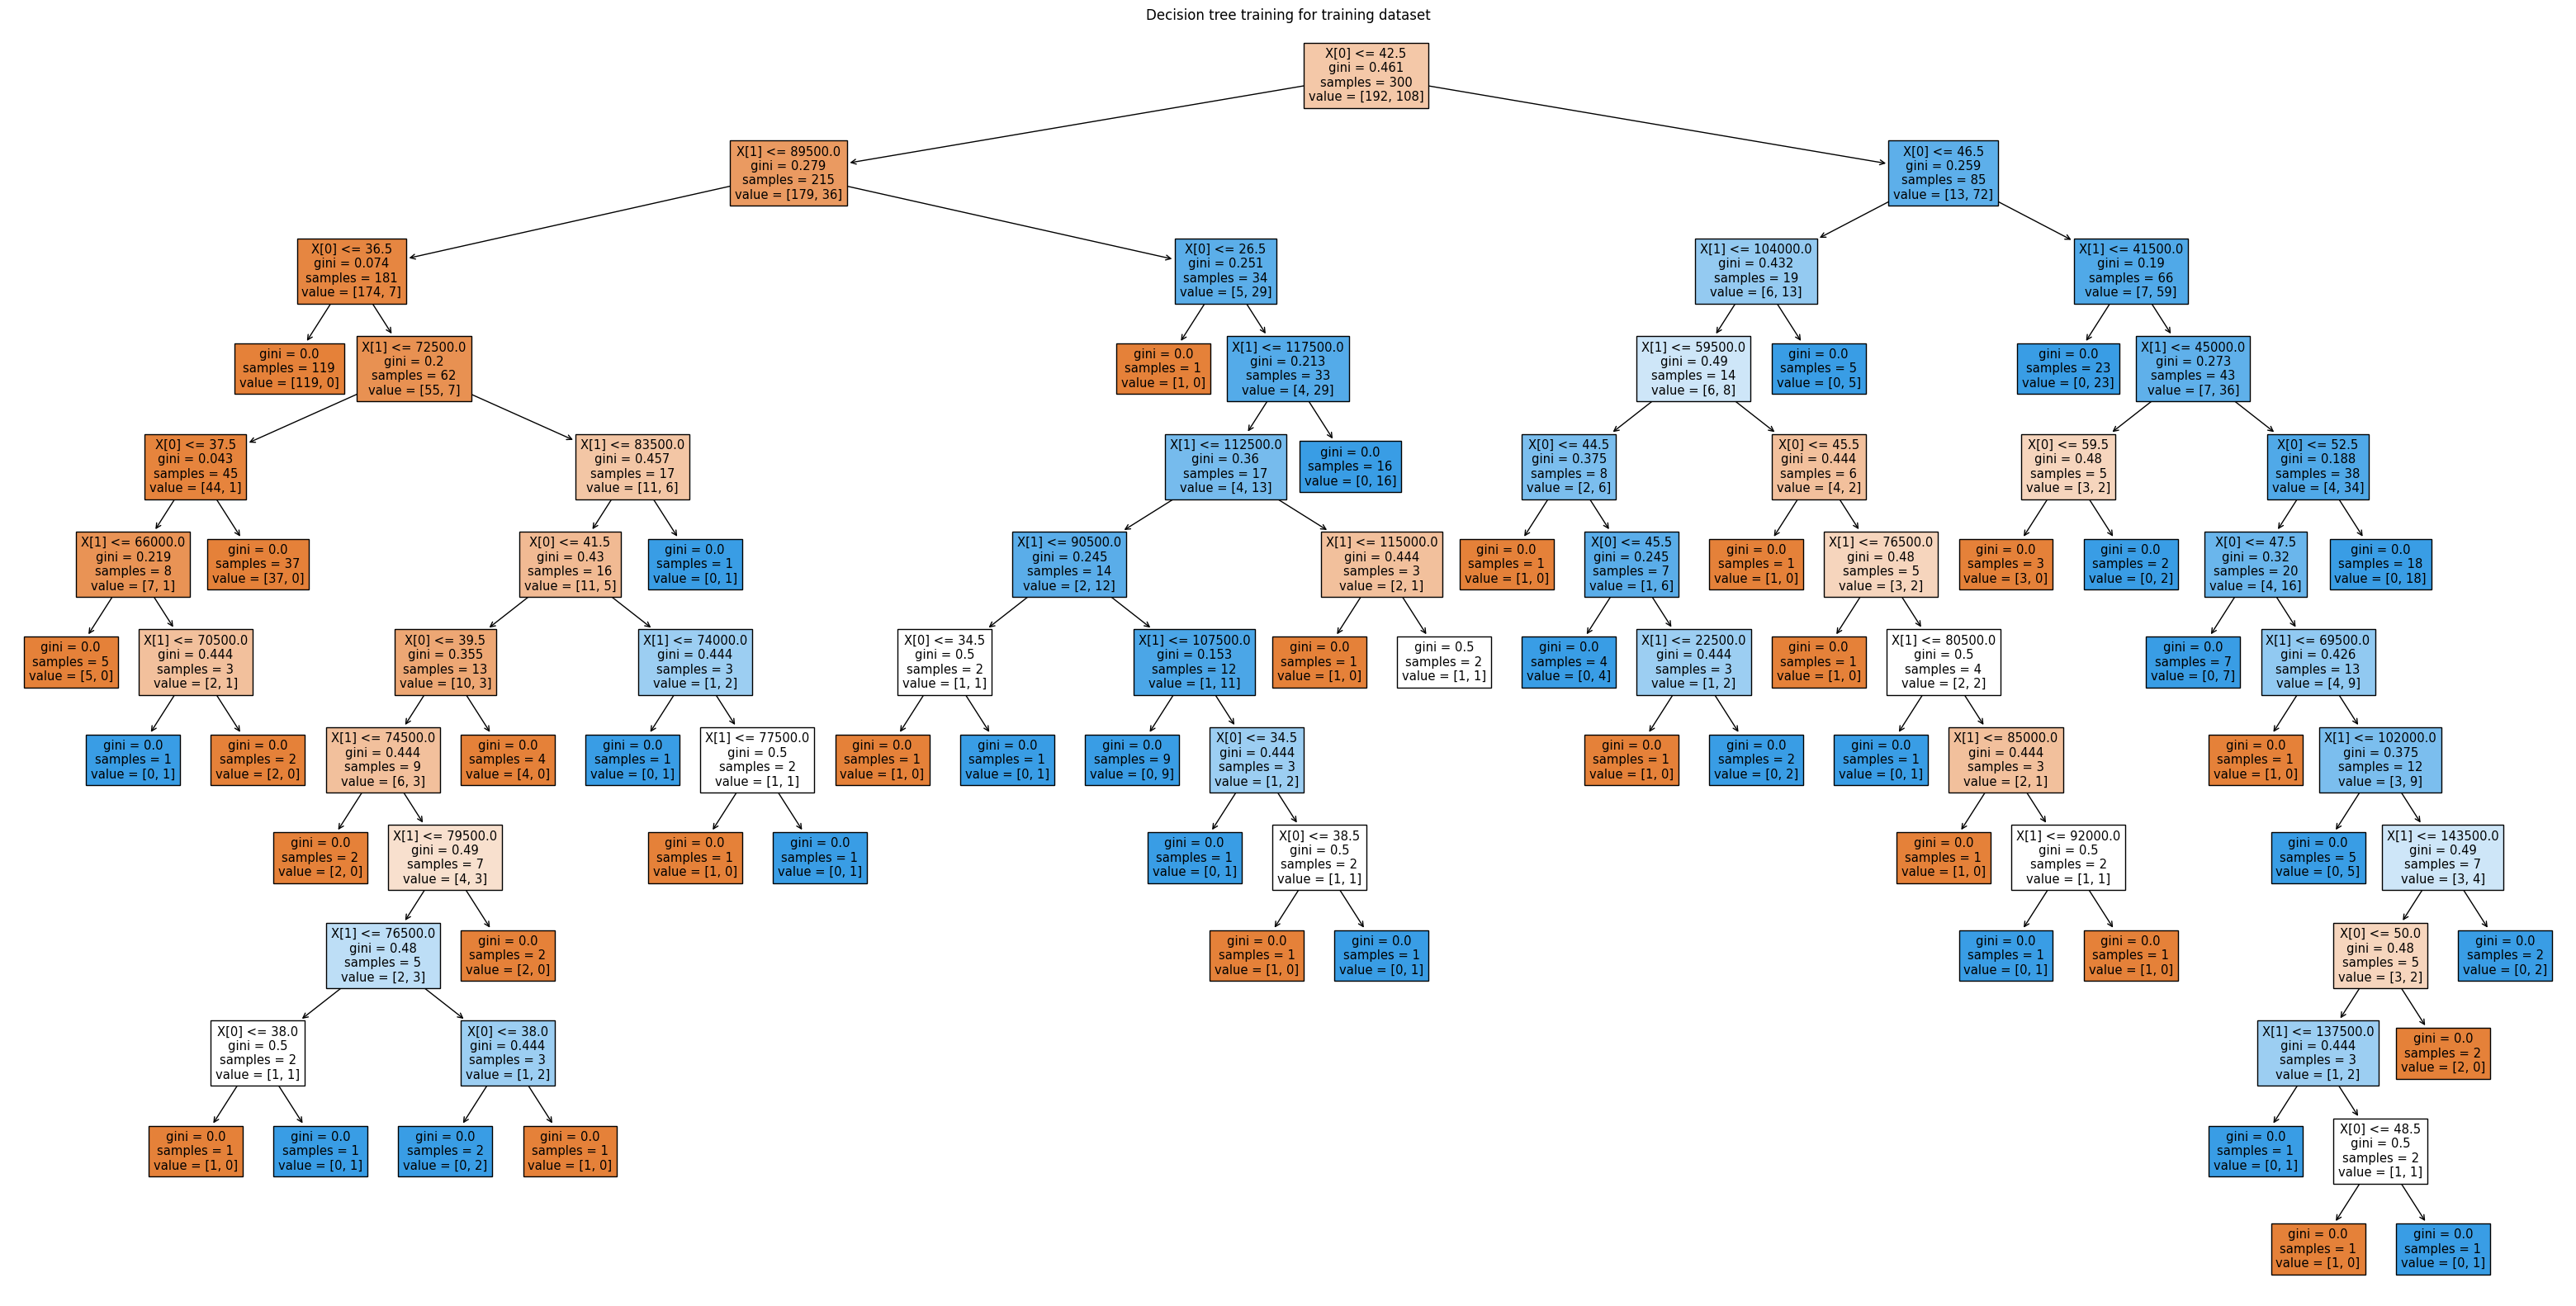

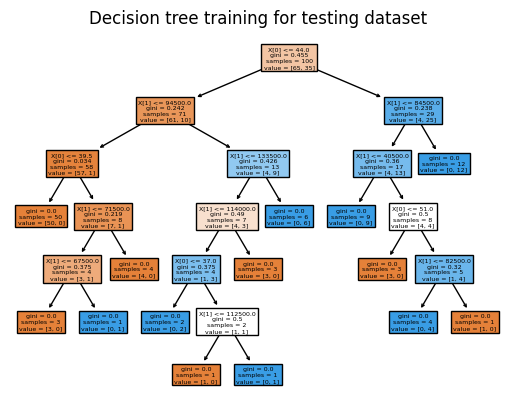

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\aoons\Downloads\decisionTree_Data.csv")
#df.info()

# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred = classifer.predict(X_test)
accuracy_score(y_pred,y_test)
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

# Bi directional Search

In [5]:
class adjacent_Node:

    def __init__(self, v):
        self.vertex = v
        self.next = None


class bidirectional_Search:

    def __init__(self, vertices):

        self.vertices = vertices
        self.graph = [None] * self.vertices

        self.source_queue = list()
        self.last_node_queue = list()

        self.source_visited = [False] * self.vertices
        self.last_node_visited = [False] * self.vertices

        self.source_parent = [None] * self.vertices
        self.last_node_parent = [None] * self.vertices

    def AddEdge(self, source, last_node):

        node = adjacent_Node(last_node)
        node.next = self.graph[source]
        self.graph[source] = node

        node = adjacent_Node(source)
        node.next = self.graph[last_node]
        self.graph[last_node] = node

    def breadth_fs(self, direction='forward'):

        if direction == 'forward':

            current = self.source_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.source_visited[vertex]:
                    self.source_queue.append(vertex)
                    self.source_visited[vertex] = True
                    self.source_parent[vertex] = current

                connected_node = connected_node.next
        else:

            current = self.last_node_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.last_node_visited[vertex]:
                    self.last_node_queue.append(vertex)
                    self.last_node_visited[vertex] = True
                    self.last_node_parent[vertex] = current

                connected_node = connected_node.next

    def is_intersecting(self):

        #
        for i in range(self.vertices):
            if (self.source_visited[i] and
                    self.last_node_visited[i]):
                return i

        return -1

    def path_st(self, intersecting_node,
                source, last_node):

        path = list()
        path.append(intersecting_node)
        i = intersecting_node

        while i != source:
            path.append(self.source_parent[i])
            i = self.source_parent[i]

        path = path[::-1]
        i = intersecting_node

        while i != last_node:
            path.append(self.last_node_parent[i])
            i = self.last_node_parent[i]

        path = list(map(str, path))

        print(' '.join(path))

    def bidirectional_search(self, source, last_node):

        self.source_queue.append(source)
        self.source_visited[source] = True
        self.source_parent[source] = -1

        self.last_node_queue.append(last_node)
        self.last_node_visited[last_node] = True
        self.last_node_parent[last_node] = -1

        while self.source_queue and self.last_node_queue:

            self.breadth_fs(direction='forward')

            self.breadth_fs(direction='backward')

            intersecting_node = self.is_intersecting()

            if intersecting_node != -1:
                print("Path exists between {} and {}".format(source, last_node))
                print("Intersection at : {}".format(intersecting_node))
                self.path_st(intersecting_node,
                             source, last_node)
                exit(0)
        return -1


if __name__ == '__main__':

    n = 17

    source = 1

    last_node = 16

    my_Graph = bidirectional_Search(n)
    my_Graph.AddEdge(1, 2)
    my_Graph.AddEdge(1, 3)
    my_Graph.AddEdge(1, 4)
    my_Graph.AddEdge(2, 5)
    my_Graph.AddEdge(2, 6)
    my_Graph.AddEdge(3, 7)
    my_Graph.AddEdge(4, 8)
    my_Graph.AddEdge(4, 9)
    my_Graph.AddEdge(5, 10)
    my_Graph.AddEdge(6, 10)
    my_Graph.AddEdge(10, 11)
    my_Graph.AddEdge(7, 11)
    my_Graph.AddEdge(7, 12)
    my_Graph.AddEdge(8, 13)
    my_Graph.AddEdge(9, 13)
    my_Graph.AddEdge(10, 6)
    my_Graph.AddEdge(11, 14)
    my_Graph.AddEdge(12, 15)
    my_Graph.AddEdge(13, 15)
    my_Graph.AddEdge(14, 16)
    my_Graph.AddEdge(15, 16)

    out = my_Graph.bidirectional_search(source, last_node)

    if out == -1:
        print("No path between {} and {}".format(source, last_node))

Path exists between 1 and 16
Intersection at : 8
1 4 8 13 15 16
Path exists between 1 and 16
Intersection at : 7
1 3 7 12 15 16
Path exists between 1 and 16
Intersection at : 7
1 3 7 12 15 16
Path exists between 1 and 16
Intersection at : 4
1 4 9 13 15 16
Path exists between 1 and 16
Intersection at : 4
1 4 9 13 15 16
Path exists between 1 and 16
Intersection at : 3
1 3 7 12 15 16
Path exists between 1 and 16
Intersection at : 3
1 3 7 12 15 16
Path exists between 1 and 16
Intersection at : 1
1 4 9 13 15 16
Path exists between 1 and 16
Intersection at : 1
1 4 9 13 15 16
Path exists between 1 and 16
Intersection at : 1
1 4 9 13 15 16
Path exists between 1 and 16
Intersection at : 1
1 4 9 13 15 16
Path exists between 1 and 16
Intersection at : 1
1 4 9 13 15 16
Path exists between 1 and 16
Intersection at : 1
1 4 9 13 15 16
No path between 1 and 16


# Iterative Deepening Search

In [2]:
def binary_search(arr, x):
	low = 0
	high = len(arr) - 1
	mid = 0

	while low <= high:

		mid = (high + low) // 2

		# If x is greater, ignore left half
		if arr[mid] < x:
			low = mid + 1

		# If x is smaller, ignore right half
		elif arr[mid] > x:
			high = mid - 1

		# means x is present at mid
		else:
			return mid

	# If we reach here, then the element was not present
	return -1


# Test array
arr = [ 2, 3, 4, 10, 40 ]
x = 5

# Function call
result = binary_search(arr, x)

if result != -1:
	print("Element is present at index", str(result))
else:
	print("Element is not present in array")

Element is not present in array


# Uniform Cost Search

In [4]:
# Python3 implementation of above approach

# returns the minimum cost in a vector( if
# there are multiple goal states)
def uniform_cost_search(goal, start):
	
	# minimum cost upto
	# goal state from starting
	global graph,cost
	answer = []

	# create a priority queue
	queue = []

	# set the answer vector to max value
	for i in range(len(goal)):
		answer.append(10**8)

	# insert the starting index
	queue.append([0, start])

	# map to store visited node
	visited = {}

	# count
	count = 0

	# while the queue is not empty
	while (len(queue) > 0):

		# get the top element of the
		queue = sorted(queue)
		p = queue[-1]

		# pop the element
		del queue[-1]

		# get the original value
		p[0] *= -1

		# check if the element is part of
		# the goal list
		if (p[1] in goal):

			# get the position
			index = goal.index(p[1])

			# if a new goal is reached
			if (answer[index] == 10**8):
				count += 1

			# if the cost is less
			if (answer[index] > p[0]):
				answer[index] = p[0]

			# pop the element
			del queue[-1]

			queue = sorted(queue)
			if (count == len(goal)):
				return answer

		# check for the non visited nodes
		# which are adjacent to present node
		if (p[1] not in visited):
			for i in range(len(graph[p[1]])):

				# value is multiplied by -1 so that
				# least priority is at the top
				queue.append( [(p[0] + cost[(p[1], graph[p[1]][i])])* -1, graph[p[1]][i]])

		# mark as visited
		visited[p[1]] = 1

	return answer

# main function
if __name__ == '__main__':
	
	# create the graph
	graph,cost = [[] for i in range(8)],{}

	# add edge
	graph[0].append(1)
	graph[0].append(3)
	graph[3].append(1)
	graph[3].append(6)
	graph[3].append(4)
	graph[1].append(6)
	graph[4].append(2)
	graph[4].append(5)
	graph[2].append(1)
	graph[5].append(2)
	graph[5].append(6)
	graph[6].append(4)

	# add the cost
	cost[(0, 1)] = 2
	cost[(0, 3)] = 5
	cost[(1, 6)] = 1
	cost[(3, 1)] = 5
	cost[(3, 6)] = 6
	cost[(3, 4)] = 2
	cost[(2, 1)] = 4
	cost[(4, 2)] = 4
	cost[(4, 5)] = 3
	cost[(5, 2)] = 6
	cost[(5, 6)] = 3
	cost[(6, 4)] = 7

	# goal state
	goal = []

	# set the goal
	# there can be multiple goal states
	goal.append(6)

	# get the answer
	answer = uniform_cost_search(goal, 0)

	# print the answer
	print("Minimum cost from 0 to 6 is = ",answer[0])

# This code is contributed by mohit kumar 29



Minimum cost from 0 to 6 is =  3


# Best First Search

In [6]:
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]

# Function For Implementing Best First Search
# Gives output path having lowest cost


def best_first_search(actual_Src, target, n):
	visited = [False] * n
	pq = PriorityQueue()
	pq.put((0, actual_Src))
	visited[actual_Src] = True
	
	while pq.empty() == False:
		u = pq.get()[1]
		# Displaying the path having lowest cost
		print(u, end=" ")
		if u == target:
			break

		for v, c in graph[u]:
			if visited[v] == False:
				visited[v] = True
				pq.put((c, v))
	print()

# Function for adding edges to graph


def addedge(x, y, cost):
	graph[x].append((y, cost))
	graph[y].append((x, cost))


# The nodes shown in above example(by alphabets) are
# implemented using integers addedge(x,y,cost);
addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)

source = 9
target = 3
best_first_search(source, target, v)




9 11 13 8 10 3 


# N Puzzle Solver (Heuristic Search)

In [9]:

import sys
import resource
from time import perf_counter
from npuzzle.visualizer import visualizer
from npuzzle.search import a_star_search, ida_star_search
from npuzzle.is_solvable import is_solvable
from npuzzle import colors
from npuzzle.colors import color
from npuzzle import parser
from npuzzle import heuristics
from npuzzle import solved_states


def pretty_print_steps(steps, size):
    width = len(str(size * size))
    decor = "-"
    for n in range(len(steps)):
        if n == 0:
            print(f"-[initial state]{4*decor}")
        else:
            print(f"-[step {n:2d}]{10*decor}")
        print()
        for i in range(size):
            for j in range(size):
                tile = str(steps[n][i * size + j])
                if tile == "0":
                    tile = color("red2", "-" * width)
                print(f" {tile:>{width}}", end="")
            print()
        print()
    print(f"{20*decor}")


def color_yes_no(v):
    return color("green", "YES") if v else color("red", "NO")


def verbose_info(args, puzzle, solved, size):
    opts1 = {
        "greedy search:": args.g,
        "uniform cost search:": args.u,
        "visualizer:": args.v,
        "solvable:": is_solvable(puzzle, solved, size),
    }
    opt_color = "cyan2"
    for k, v in opts1.items():
        print(color(opt_color, k), color_yes_no(v))

    opts2 = {
        "heuristic function:": color("green2", args.f),
        "puzzle size:": str(size),
        "solution type:": color("green2", args.s),
        "initial state:": str(puzzle),
        "final state:": str(solved),
    }
    for k, v in opts2.items():
        print(color(opt_color, k), v)

    print(color("blue2", "heuristic scores for initial state"))
    for k, v in heuristics.KV.items():
        print(color("blue2", f"  - {k}\t:"), v(puzzle, solved, size))

    print(color("red2", "search algorithm:"), "IDA*" if args.ida else "A*")


#########################################################################################

if __name__ == "__main__":
    data = parser.get_input()
    if not data:
        sys.exit()
    puzzle, size, args = data
    if args.c:
        colors.enabled = True

    if args.ida:
        args.g = False

    TRANSITION_COST = 1
    if args.g:
        TRANSITION_COST = 0

    HEURISTIC = heuristics.KV[args.f]
    if args.u:
        HEURISTIC = heuristics.uniform_cost

    solved = solved_states.KV[args.s](size)
    verbose_info(args, puzzle, solved, size)
    if not is_solvable(puzzle, solved, size):
        print(color("red", "this puzzle is not solvable"))
        sys.exit(0)

    maxrss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
    print(color("red", "max rss before search:"), maxrss)

    t_start = perf_counter()
    if args.ida:
        res = ida_star_search(puzzle, solved, size, HEURISTIC, TRANSITION_COST)
    else:
        res = a_star_search(puzzle, solved, size, HEURISTIC, TRANSITION_COST)
    t_delta = perf_counter() - t_start

    maxrss = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
    print(color("red", "max rss after search: "), maxrss)

    print(color("yellow", "search duration:") + f" {t_delta:.4f} second(s)")
    success, steps, complexity = res
    num_evaluated = complexity["time"]
    time_per_node = t_delta / max(num_evaluated, 1)
    print(f"{num_evaluated} {color('yellow', 'evaluated nodes')} ", end="")
    print(f"{time_per_node:.8f} {color('yellow', 'second(s) per node')}")
    if success:
        print(color("green", "length of solution:"), max(len(steps) - 1, 0))
        print(color("green", "initial state and solution steps:"))
        if args.p:
            pretty_print_steps(steps, size)
        else:
            for s in steps:
                print(s)
    else:
        print(color("red", "solution not found"))
    print(color("magenta", "space complexity:"), complexity["space"], "nodes in memory")
    print(color("magenta", "time complexity:"), complexity["time"], "evaluated nodes")
    if success and args.v:
        visualizer(steps, size)


ModuleNotFoundError: No module named 'resource'